## Kelompok: 20
## Anggota

*   Abdul Aziz Surya Prawira
*   Haikal Khubbi Saputra
*   Sandi Yoga Wirayudha
*   Tuan Harun Parhorasan Sinambela
*   Yolanda Arnaspen


# Problem Definition
#### Topik : Deteksi URL Phishing

## Latar Belakang
Di era digital saat ini, serangan phishing telah menjadi ancaman yang persisten, mengancam keamanan dan privasi individu maupun organisasi. Menurut studi Proofpoint, 71% perusahaan mengalami serangan phishing yang berhasil pada tahun 2023, sementara Pusat Keluhan Kejahatan Internet (IC3) FBI menerima 800.944 laporan phishing, dengan kerugian melebihi $10.3 miliar pada tahun 2022. Data dari Anti-Phishing Working Group (APWG) menemukan ada 5 juta situs phishing unik pada tahun 2023, dan analisis IBM menemukan bahwa 16% dari pelanggaran data perusahaan berasal langsung dari serangan phishing. 

Contoh kasus phishing di bidang perbankan adalah kampanye phishing Carbanak yang ditemukan pada tahun 2015, yang menargetkan lebih dari 100 lembaga keuangan global menggunakan email spear-phishing dan malware canggih, mengakibatkan kerugian yang diperkirakan mencapai $1 miliar secara total, dengan rata-rata antara $2,5 juta dan $10 juta per bank yang ditargetkan. 

Menyadari urgensi dalam mengatasi ancaman ini, kami mencoba menggunakan deep learning untuk pendeteksian URL phishing. Model deep learning dapat dilatih pada kumpulan data url teks yang telah diberi label sebagai phishing atau bukan phishing berserta beberapa fitur yang merupakan indikator url phishing. Model ini kemudian dapat digunakan untuk mengklasifikasikan url sebagai phishing atau bukan phishing.

sc : https://www.techopedia.com/phishing-statistics

## Tujuan Penelitian
Membuat model deep learning yang dapat mengidentifikasi suatu url itu termasuk phishing atau bukan.

## Data yang akan dipakai
Data yang akan digunakan berasal dari dua sumber. Untuk data url phishing diambil dari phishtank, dan data url biasa (benign) diambil dari kaggle.

Data yang diambil dari kedua sumber tadi hanya url saja. Feature dibuat sendiri.

http://data.phishtank.com/data/online-valid.csv.gz [phishing url]
https://www.kaggle.com/datasets/siddharthkumar25/malicious-and-benign-urls [benign url]

## Metode
Karena tujuan pembuatan model ini hanya untuk menentukan suatu url adalah phishing atau bukan, metode yang digunakan adalah binary classification.

## Model
Berdasarkan percobaan sebelumnya, memilih dua model dengan hasil akurasi terbaik yaitu XGBoost Classifier dan Multilayer Perceptron.


# Preparation | Persiapan
### Import Libraries

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

import keras
from keras.models import Sequential
from keras.layers import Dense

import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import pickle

## Get Data | Mendapatkan Data

In [142]:
# load data
df = pd.read_csv("dataset.csv")

## Explore Data (EDA) | Eksplorasi Data

In [143]:
# Check data
# Mengecek jumlah row dan column, tampilkan 10 row teratas
print('rows & column : ', df.shape)
df.head(10)

rows & column :  (2000, 23)


,url,label,have_ip,url_length,domain_length,special_char,punycode,shortener,url_slash,prefsuffix,...,tls,at,abnormalreq,anchor,link,mailto,forwarding,mouseover,right_click,popup
0,https://www.samsung.com/,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
1,https://www.metropoles.com/,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
2,https://www.ccm.net/,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
3,https://www.coincheck.com/,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
4,https://www.mts.ru/,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
5,https://www.autotrader.com/,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
6,https://www.pinterest.jp/,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
7,https://www.bancodevenezuela.com/,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
8,https://www.hitc.com/,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
9,https://www.pcstore.com.tw/,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0


In [144]:
# Mendeskripsikan data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   url              2000 non-null   object
 1   label            2000 non-null   int64 
 2   have_ip          2000 non-null   int64 
 3   url_length       2000 non-null   int64 
 4   domain_length    2000 non-null   int64 
 5   special_char     2000 non-null   int64 
 6   punycode         2000 non-null   int64 
 7   shortener        2000 non-null   int64 
 8   url_slash        2000 non-null   int64 
 9   prefsuffix       2000 non-null   int64 
 10  subdomain        2000 non-null   int64 
 11  favicon          2000 non-null   int64 
 12  nonstandardport  2000 non-null   int64 
 13  tls              2000 non-null   int64 
 14  at               2000 non-null   int64 
 15  abnormalreq      2000 non-null   int64 
 16  anchor           2000 non-null   int64 
 17  link             2000 non-null   

,label,have_ip,url_length,domain_length,special_char,punycode,shortener,url_slash,prefsuffix,subdomain,...,tls,at,abnormalreq,anchor,link,mailto,forwarding,mouseover,right_click,popup
count,2000.000000,2000.0,2000.00000,2000.000000,2000.000000,2000.0,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.00000,2000.000000,2000.00000,2000.000000,2000.00000,2000.000000,2000.000000,2000.0,2000.000000,2000.000000
mean,0.500000,0.0,0.22150,0.228000,0.277500,0.0,0.050000,0.010000,0.003500,0.138000,...,0.03950,0.005500,0.40400,0.664000,0.68700,0.044000,0.003500,0.0,0.000500,0.037500
std,0.500125,0.0,0.41536,0.419648,0.447877,0.0,0.217999,0.099524,0.059072,0.344986,...,0.19483,0.073976,0.49082,0.472457,0.46383,0.205146,0.059072,0.0,0.022361,0.190031
min,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.500000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,1.000000,1.00000,0.000000,0.000000,0.0,0.000000,0.000000
75%,1.000000,0.0,0.00000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,1.00000,1.000000,1.00000,0.000000,0.000000,0.0,0.000000,0.000000
max,1.000000,0.0,1.00000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,0.0,1.000000,1.000000


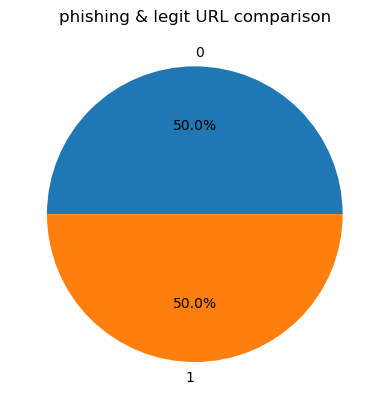

In [145]:
# Visualisasi data menggunakan pie chart untuk melihat perbandingan url legit dan phishing
value_counts = df['label'].value_counts()

plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.title('phishing & legit URL comparison')
plt.show()

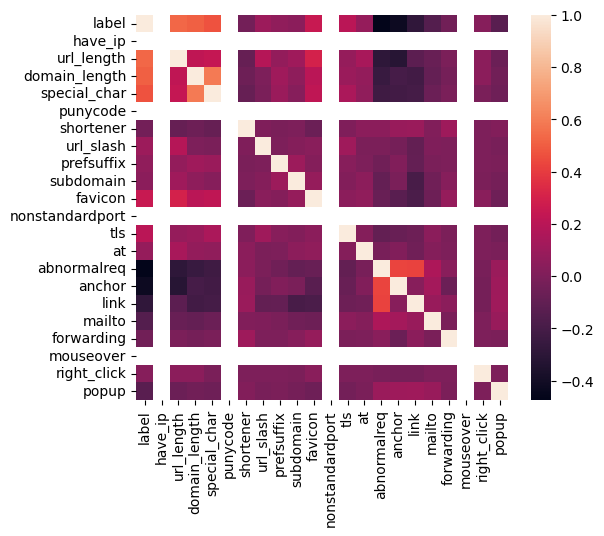

In [146]:
# correlation heatmap
dfx = df.drop(['url'], axis = 1).copy()
plt.figure(figsize=(6,5))
sns.heatmap(dfx.corr())
plt.show()

## Preprocess Data | Proses Awal Data

In [147]:
# Hapus kolom url
# kolom url dihapus karena hanya berisi url sehingga tidak diperlukan.
# fitur lain telah mewakili fungsi dari kolom url
data = df.drop(['url'], axis = 1).copy()

In [148]:
# Cek data null atau kosong
data.isnull().sum()

label              0
have_ip            0
url_length         0
domain_length      0
special_char       0
punycode           0
shortener          0
url_slash          0
prefsuffix         0
subdomain          0
favicon            0
nonstandardport    0
tls                0
at                 0
abnormalreq        0
anchor             0
link               0
mailto             0
forwarding         0
mouseover          0
right_click        0
popup              0
dtype: int64

In [149]:
# Mengacak row di dataset agar data terdistribusi dengan rata.
data = data.sample(frac=1).reset_index(drop=True)

In [150]:
# Memisahkan Feature dan Target
y = data['label'] #target
X = data.drop('label',axis=1) #feature

# Membagi data training dan data test
# Data training dan data test dibagi menjadi 80% data training dan 20% data test (test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 12)

# Model Training | Pelatihan Model
Berdasarkan percobaan yang kami lakukan pada tugas sebelumnya (tugas machine learning & deep learning), kami memilih dua model dengan akurasi terbaik yaitu :
- XGBoost Classifier
- Multilayer Perceptron

### 1. XGBoost Classifier
XGBoost adalah implementasi open-source yang populer dan efisien dari algoritma gradient boosted trees. Gradient Boosting adalah algoritma supervised learning, yang mencoba memprediksi variabel target secara akurat dengan menggabungkan perkiraan serangkaian model yang lebih sederhana dan lebih lemah.

https://docs.aws.amazon.com/id_id/sagemaker/latest/dg/xgboost-HowItWorks.html

In [151]:
# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
# fit the model
xgb.fit(X_train, y_train)

# predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

# hitung akurasi (performa model)
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)
print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.912
XGBoost : Accuracy on test Data: 0.907


### 2. Multilayer Perceptron
Multi Layer Perceptron juga dikenal sebagai MLP adalah layer dense yang terhubung sepenuhnya, yang mengubah dimensi masukan apa pun ke dimensi yang diinginkan. Multi Layer Perceptron adalah jaringan saraf yang memiliki banyak layer. Untuk membuat jaringan saraf, kita menggabungkan neuron sehingga keluaran dari beberapa neuron merupakan masukan dari neuron lain.

https://www.geeksforgeeks.org/multi-layer-perceptron-learning-in-tensorflow/?ref=lbp
https://www.kaggle.com/code/gajjadarahul/multi-layer-perceptron-binary-classification-tf-2

##### Hyperparameter Tuning
- epochs = 100
- optimizer = adam
- learning rate = 0.001
- hidden layer = 2 (64 & 32 neurons, ReLU activation)
- output layer = sigmoid activation

In [152]:
# build model
## set model type
mlp = Sequential()

## add layers
mlp.add(Dense(64, activation='relu', input_shape=(21,))) # input & hidden layer 1 (64 neuron)
mlp.add(Dense(32, activation='relu')) # hidden layer 2 (32 neuron)
mlp.add(Dense(1, activation='sigmoid')) # output layer

# initializing adam optimizer for training model
adam = keras.optimizers.Adam(learning_rate=0.001)

/home/psychobytes/.local/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [153]:
# print model summary
mlp.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 64)             │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

In [154]:
# compile model
mlp.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])

# fit / run model
mlp.fit(X_train, y_train, epochs=100)

Epoch 1/100


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 683us/step - accuracy: 0.6546 - loss: 0.6364 
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - accuracy: 0.8752 - loss: 0.4017
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.8754 - loss: 0.2982
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - accuracy: 0.8862 - loss: 0.2780
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - accuracy: 0.8985 - loss: 0.2382
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - accuracy: 0.9028 - loss: 0.2436
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.8971 - loss: 0.2471
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - accuracy: 0.8890 - loss: 0.2664
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.9065 - loss: 0.2299
Epoch 10/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - accuracy: 0.8994 - loss: 0.2431
Epoch 11/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.9022 - loss: 0.2401
Epoch 12/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/ste

# Model Evaluation | Evaluasi Model
Evaluasi performa model akan dilakukan dengan mengumpulkan skor akurasi (accuracy metrics) pada setiap model. semakin tinggi skor akurasi berarti model lebih banyak memprediksi data dengan benar.

Selain akurasi, kami juga mempertimbangkan jumlah false negative dan false positive. Karena ini adalah masalah binary classification untuk menentukan suatu url adalah phishing atau bukan, jumlah false negative harus seminimal mungkin(jangan sampai ada url phishing dianggap bukan phishing).

In [155]:
# variabel untuk menyimpan result nilai performa model
Model = [] # nama model
acc_train = [] # akurasi train
acc_test = [] # akurasi test

# fungsi untuk menyimpan Result
# fungsi ini akan dipanggil setiap setelah pengujian performa model dilakukan
def storeResults(model, a,b):
    Model.append(model)
    acc_train.append(round(a, 3))
    acc_test.append(round(b, 3))


#### XGBoost Classifier

In [156]:
# evaluate model
xgb_train_metrics = accuracy_score(y_train,y_train_xgb)
xgb_test_metrics = accuracy_score(y_test,y_test_xgb)

storeResults('XGBoost', xgb_train_metrics, xgb_test_metrics)

#### Multilayer Perceptron

In [157]:
# evaluate model
mlp_train_metrics = mlp.evaluate(X_train, y_train)
mlp_test_metrics = mlp.evaluate(X_test, y_test)

storeResults('MLP', mlp_train_metrics[1], mlp_test_metrics[1])

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.9160 - loss: 0.2017
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - accuracy: 0.9207 - loss: 0.2300


## Hasil Evaluasi Model
Evaluasi model dilakukan dengan membandingkan skor akurasi setiap algoritma yang digunakan.

In [158]:
# buat dataframe hasil
results = pd.DataFrame({ 'ML Model': Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,XGBoost,0.912,0.907
1,MLP,0.912,0.913


In [159]:
# urutkan dataframe berdasarkan akurasi tertinggi
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
1,MLP,0.912,0.913
0,XGBoost,0.912,0.907


Hasil evaluasi model / perbandingan akurasi model divisualisasikan menggunakan barchart

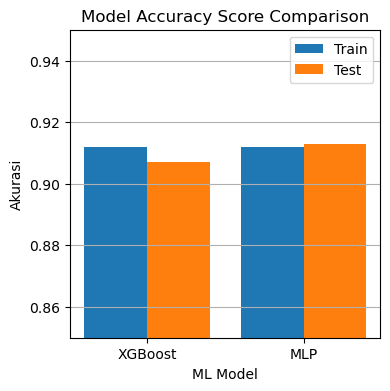

In [160]:
# barchart perbandingan skor akurasi model
plt.figure(figsize=(4, 4))
plt.bar(results["ML Model"], results["Train Accuracy"], label='Train', width=0.4, align='center')
plt.bar([x + 0.4 for x in range(len(results))], results["Test Accuracy"], label='Test', width=0.4, align='center')
plt.xlabel('ML Model')
plt.ylabel('Akurasi')
plt.title('Model Accuracy Score Comparison')
plt.xticks([x + 0.2 for x in range(len(results))], results["ML Model"])
plt.legend()
plt.grid(axis='y')
plt.ylim(0.85, 0.95)

# Menampilkan bar chart
plt.show()

Confusion Matrix digunakan untuk mengevaluasi performa model dengan akurasi yang paling tinggi yaitu MLP. Confusion matrix digunakan untuk melihat jumlah false positive pada prediksi model.

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


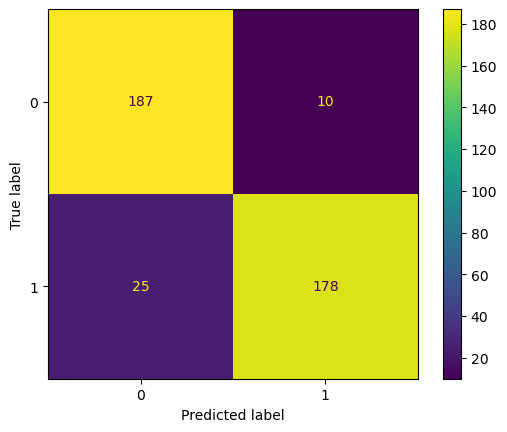

In [161]:
# confusion matrix model mlp
mlp_predicted = mlp.predict(X_test)
mlp_predicted = tf.squeeze(mlp_predicted)
mlp_predicted = np.array([1 if x >= 0.5 else 0 for x in mlp_predicted])
actual = np.array(y_test)
conf_mat = confusion_matrix(actual, mlp_predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

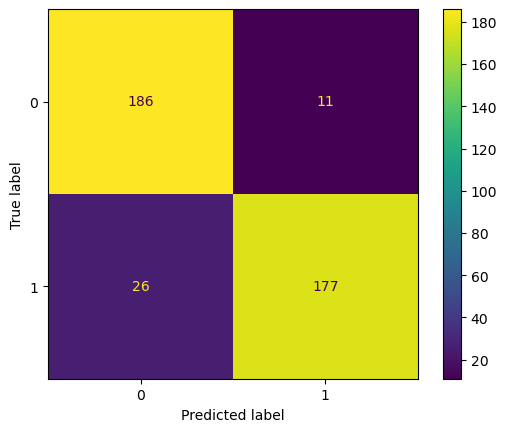

In [162]:
# confusion matrix model XGboost
cm = confusion_matrix(y_test, y_test_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Model Selection | Pemilihan Model

Berdasarkan hasil evaluasi algoritma SLP, MLP dan CNN, diputuskan untuk memilih model MLP (Multi Layer Perceptron) karena memiliki skor akurasi yang paling tinggi.

In [163]:
# save model
pickle.dump(mlp, open("MultilayerPerceptron-phishing.pickle.dat", "wb"))